## Conhhecendo o Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('superstore_data.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

*Descrição das colunas do dataset*
* Id: número único de cada cliente
* Year_Birth: ano de nascimento do cliente
* Education: nível de educação do cliente
* Maritial_Status: estado civíl
* Income: renda familiar anual
* Kidhome: número de crianças em casa
* Teenhome: número de adolescentes em casa
* Dt_Customer:data de inscrição do cliente na empresa
* Recency: número de dias desde a última compra
* MntWines: o valor gasto em produtos vitivinícolas nos últimos 2 anos
* MntFruits: o valor gasto em frutas nos últimos 2 anos
* MntMeatProducts: o valor gasto em produtos de carne nos últimos dois anos
* MntFishProducts: o valor gasto em produtos de peixe nos últimos dois anos
* MntSweetProducts: o valor gasto em produtos doces nos últimos dois anos
* MntGoldProds: o valor gasto em produtos de ouro nos últimos dois anos
* NumDealsPurchases: números de compras feitas com desconto
* NumWebPurchases: número de compras feitas através do site da empresa
* NumCatalogPurchases: número de compras feitas por catálogo (compra de mercadorias para envio pelo correio)
* NumStorePurchases: número de compras feitas diretamente nas lojas
* NumWebVisitsMonth: número de visitas ao site da empresa no último mês
* Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário
* Complain: 1 se o cliente reclamou nos últimos 2 anos

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.Year_Birth.max() - df.Year_Birth.min()

In [ ]:
df.Education.value_counts()

In [ ]:
df.Marital_Status.value_counts()

In [ ]:
df.Teenhome.value_counts()

In [ ]:
df.Kidhome.value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.loc[df['Income'].isnull()]

In [ ]:
df.isnull().sum() / len(df) * 100 # porcentagem de valores nulos

In [ ]:
df.drop_duplicates()

In [ ]:
df.shape

### Observações

* A coluna "Dt_Customer" não está no formato correto (data), iremos corrigir isso posteriormente;
* A coluna "Year_Birth" tem uma grande diferença entre seu valor máximo e mínimo;
* Há muitas categorias na coluna "Maritial_Status", podemos resolver isso ao definir "Alone", "YOLO", e "Absurd" como "Single" e "Together" como "Married";
* A coluna Education possui a categoria "Master" e "2n Cycle", no qual significam a mesma coisa;
* Podemos excluir a coluna "Id";
* A coluna "Income" possui valores nulos (1.07%).

Os valores nulos (Income) e a exclusão (Id) serão feitos mais adiante, pois trataremos individualmente.

## Tratamento e exploração dos dados

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,7)

Alterando o tipos da variável para datetime

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y') # atribuindo tipo datetime para a variável "Dt_Customer"

In [ ]:
df.dtypes

In [ ]:
df.head(3)

Verificando e removendo os outliers da coluna "Year_Birth"

In [ ]:
px.box(df, x='Year_Birth') # outliers

In [7]:
df = df.loc[df['Year_Birth'] > 1900] # retirando outliers

In [ ]:
df.shape

In [ ]:
px.box(df, x='Year_Birth') # verificando

Diminuindo o número de categorias das colunas "Maritial_Status" e "Education"

In [5]:
# substituindo características em uma só categoria
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO', 'Alone'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'], 'Married')

In [ ]:
df.Marital_Status.value_counts()

In [6]:
df['Education'] = df['Education'].replace(['2n Cycle'], 'Master') # transformando categorias em uma só

In [ ]:
df.Education.value_counts()

A exclusão da coluna "Id" e o tratamento dos valores nulos para a colunas "Income" serão feitos mais adiante, pois trataremos cada um de forma individual. Vejamos agora a questão de outliers nas variaveis: 
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds

#### MntWines

In [ ]:
plt.title('MntWines')
plt.boxplot(df['MntWines'])
plt.show()

plt.hist(df['MntWines'])
plt.show()

print('Mediana: {}' .format(df['MntWines'].median()))
print('Média: {}' .format(df['MntWines'].mean()))

A média esta muito distante do centro da distribuição, porém, ainda sim, podem refletir o cenário do mundo real, em que algumas pessoas consomem mais que outras.

#### MntFruits

In [ ]:
plt.title('MntFruits')
plt.boxplot(df['MntFruits'])
plt.show()

plt.hist(df['MntFruits'])
plt.show()

print('Mediana: {}' .format(df['MntFruits'].median()))
print('Média: {}' .format(df['MntFruits'].mean()))

A média esta muito distante do centro da distribuição, porém, ainda sim, podem refletir o cenário do mundo real, em que algumas pessoas consomem mais que outras.

#### MntMeatProducts

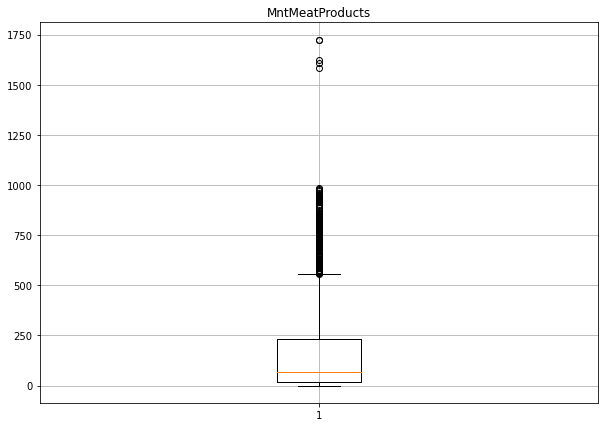

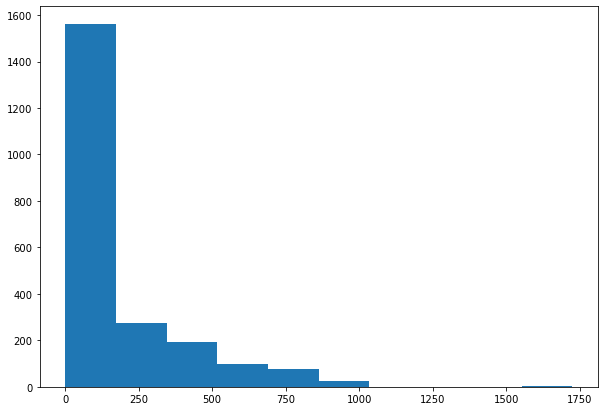

Mediana: 67.0
Média: 166.91685292802862


In [8]:
plt.title('MntMeatProducts')
plt.boxplot(df['MntMeatProducts'])
plt.grid(True)
plt.show()

plt.hist(df['MntMeatProducts'])
plt.show()

print('Mediana: {}' .format(df['MntMeatProducts'].median()))
print('Média: {}' .format(df['MntMeatProducts'].mean()))

Aqui podemos observar existem valores que estão muito longe do restante das observações, e isso pode influenciar na nossa análise. Vamos traze-los para mais perto dos nossos dados.

In [9]:
df['MntMeatProducts'].clip(upper=984, inplace = True)

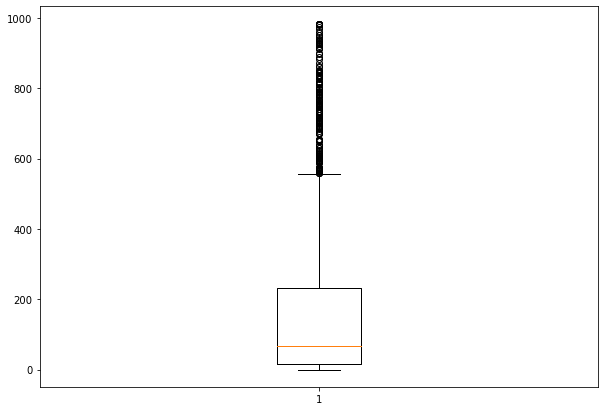

In [11]:
plt.boxplot(df['MntMeatProducts'])
plt.show()

#### MntFishProducts

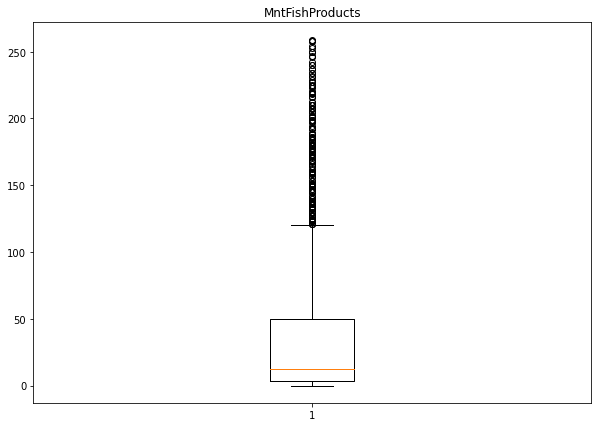

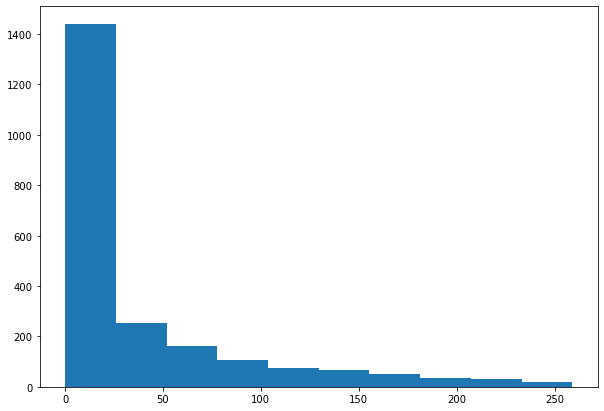

Mediana: 12.0
Média: 37.52302190433616


In [13]:
plt.title('MntFishProducts')
plt.boxplot(df['MntFishProducts'])
plt.show()

plt.hist(df['MntFishProducts'])
plt.show()

print('Mediana: {}' .format(df['MntFishProducts'].median()))
print('Média: {}' .format(df['MntFishProducts'].mean()))

A média esta muito distante do centro da distribuição, porém, ainda sim, podem refletir o cenário do mundo real, em que algumas pessoas consomem mais que outras.

#### MntSweetProducts

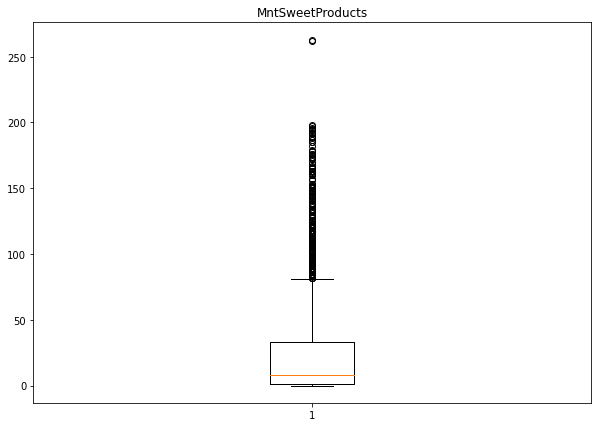

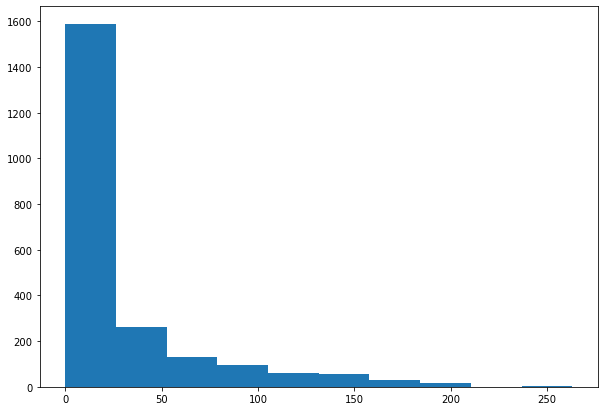

Mediana: 8.0
Média: 27.068842199374163


In [15]:
plt.title('MntSweetProducts')
plt.boxplot(df['MntSweetProducts'])
plt.show()

plt.hist(df['MntSweetProducts'])
plt.show()

print('Mediana: {}' .format(df['MntSweetProducts'].median()))
print('Média: {}' .format(df['MntSweetProducts'].mean()))

Novamente obtivemos valores extremos, mais distante do resto do conjunto de dados.

In [18]:
df.MntSweetProducts.nlargest(10)

210     198
305     198
449     198
31      197
1502    196
2067    195
994     194
1143    194
1785    194
1055    192
Name: MntSweetProducts, dtype: int64

In [19]:
df.MntSweetProducts.clip(upper=198, inplace= True)

#### MntGoldProds

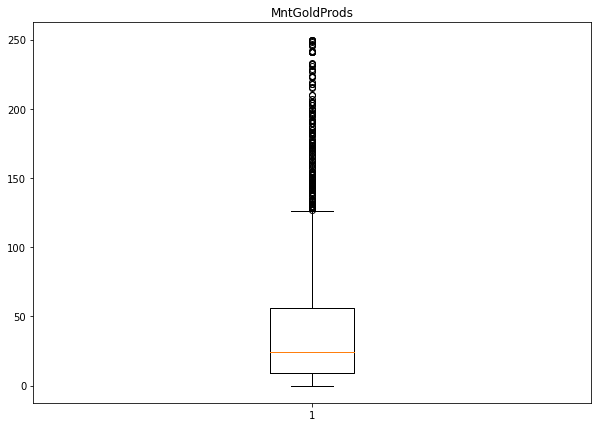

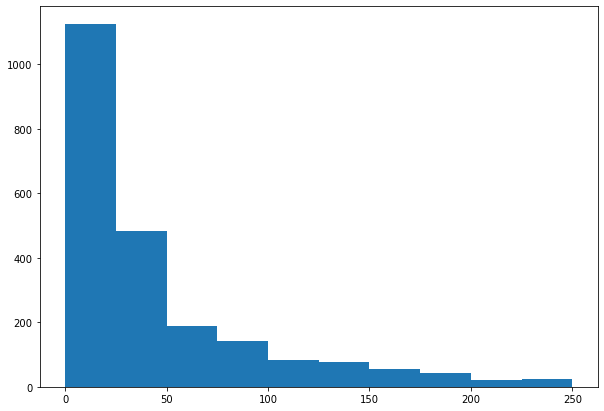

Mediana: 24.0
Média: 43.86320965578901


In [23]:
plt.title('MntGoldProds')
plt.boxplot(df['MntGoldProds'])
plt.show()

plt.hist(df['MntGoldProds'])
plt.show()

print('Mediana: {}' .format(df['MntGoldProds'].median()))
print('Média: {}' .format(df['MntGoldProds'].mean()))

Mais valores extremos.

In [22]:
df.MntGoldProds.clip(upper=250, inplace= True)

Agora veremos:
* NumDealsPurchases
* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases
* NumWebVisitsMonth

#### NumDealsPurchases

In [29]:
for i in df.loc[df['Income'].isnull()].itertuples():
    df.loc[df.Id == i.Id, 'Income'] = df.loc[(df['Education'] == i.Education) & 
                                        (df['Marital_Status'] == i.Marital_Status) & 
                                        (df['Kidhome'] == i.Kidhome) & 
                                        (df['Teenhome'] == i.Teenhome), 'Income'].mean()

df.loc[df['Income'].isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2165,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,10,7,3,2,1,4,6,0,0


In [ ]:
df = df.drop('Id', axis=1) # excluindo coluna id